In [1]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
world_ranking= pd.read_csv(r"C:\Users\admin\fifa_dataset.csv")
world_cup= pd.read_csv(r"C:\Users\admin\world_cup.csv")
matches = pd.read_csv(r"C:\Users\admin\matches_1930_to_2022.csv")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
world_ranking

,team,team_code,association,rank,previous_rank,points,previous_points
0,Brazil,BRA,CONMEBOL,1,1,1841.30,1837.56
1,Belgium,BEL,UEFA,2,2,1816.71,1821.92
2,Argentina,ARG,CONMEBOL,3,3,1773.88,1770.65
3,France,FRA,UEFA,4,4,1759.78,1764.85
4,England,ENG,UEFA,5,5,1728.47,1737.46
...,...,...,...,...,...,...,...
206,Sri Lanka,SRI,AFC,207,207,825.25,825.25
207,US Virgin Islands,VIR,CONCACAF,208,208,823.97,823.97
208,British Virgin Islands,VGB,CONCACAF,209,209,809.32,809.32
209,Anguilla,AIA,CONCACAF,210,210,790.74,790.74


In [5]:
world_cup

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Attendance,AttendanceAvg,Matches
0,2022,Qatar,32,Argentina,France,Kylian Mbappé - 8,3404252,53191,64
1,2018,Russia,32,France,Croatia,Harry Kane - 6,3031768,47371,64
2,2014,Brazil,32,Germany,Argentina,James Rodríguez - 6,3429873,53592,64
3,2010,South Africa,32,Spain,Netherlands,"Wesley Sneijder, Thomas Müller... - 5",3178856,49670,64
4,2006,Germany,32,Italy,France,Miroslav Klose - 5,3352605,52384,64
5,2002,"Korea Republic, Japan",32,Brazil,Germany,Ronaldo - 8,2705337,42271,64
6,1998,France,32,France,Brazil,Davor Šuker - 6,2903477,45367,64
7,1994,United States,24,Brazil,Italy,"Hristo Stoichkov, Oleg Salenko - 6",3587538,68991,52
8,1990,Italy,24,West Germany,Argentina,Salvatore Schillaci - 6,2516215,48389,52
9,1986,Mexico,24,Argentina,West Germany,Gary Lineker - 6,2394031,46039,52


In [6]:
matches

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,away_manager,away_captain,Attendance,Venue,Officials,Round,Date,Score,Referee,Notes,Host,Year,home_goal,away_goal,home_goal_long,away_goal_long,home_own_goal,away_own_goal,home_penalty_goal,away_penalty_goal,home_penalty_miss_long,away_penalty_miss_long,home_penalty_shootout_goal_long,away_penalty_shootout_goal_long,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,Didier Deschamps,Hugo Lloris,88966,"Lusail Iconic Stadium, Lusail",Szymon Marciniak (Referee) · Paweł Sokolnicki ...,Final,2022-12-18,(4) 3–3 (2),Szymon Marciniak,Argentina won on penalty kicks following extra...,Qatar,2022,Ángel Di María · 36|Lionel Messi · 108,Kylian Mbappé · 81,['36&rsquor;|2:0|Ángel Di María|Assist:|Alexis...,['81&rsquor;|2:2|Kylian Mbappé|Assist:|Marcus ...,NaN,NaN,Lionel Messi (P) · 23,Kylian Mbappé (P) · 80|Kylian Mbappé (P) · 118,NaN,NaN,"['2|1:1|Lionel Messi', '4|2:1|Paulo Dybala', '...","['1|0:1|Kylian Mbappé', '7|3:2|Randal Kolo Mua...",NaN,"['3|1:1|Kingsley Coman', '5|2:1|Aurélien Tchou...",NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,Hoalid Regragui,Hakim Ziyech,44137,"Khalifa International Stadium, Doha",Abdulrahman Ibrahim Al Jassim (Referee) · Tale...,Third-place match,2022-12-17,2–1,Abdulrahman Ibrahim Al Jassim,NaN,Qatar,2022,Joško Gvardiol · 7|Mislav Oršić · 42,Achraf Dari · 9,['7&rsquor;|1:0|Joško Gvardiol|Assist:|Ivan Pe...,['9&rsquor;|1:1|Achraf Dari'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...
2,France,Morocco,2,2.0,NaN,0,0.9,NaN,Didier Deschamps,Hugo Lloris,Hoalid Regragui,Romain Saïss,68294,"Al Bayt Stadium, Al Khor",César Arturo Ramos (Referee) · Alberto Morín (...,Semi-finals,2022-12-14,2–0,César Arturo Ramos,NaN,Qatar,2022,Theo Hernández · 5|Randal Kolo Muani · 79,NaN,"['5&rsquor;|1:0|Theo Hernández', '79&rsquor;|2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,Zlatko Dalić,Luka Modrić,88966,"Lusail Iconic Stadium, Lusail",Daniele Orsato (Referee) · Ciro Carbone (AR1) ...,Semi-finals,2022-12-13,3–0,Daniele Orsato,NaN,Qatar,2022,Julián Álvarez · 39|Julián Álvarez · 69,NaN,"['39&rsquor;|2:0|Julián Álvarez', '69&rsquor;|...",NaN,NaN,NaN,Lionel Messi (P) · 34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',..."
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,Fernando Santos,Pepe,44198,"Al Thumama Stadium, ath-Thumāma",Facundo Tello (Referee) · Ezequiel Brailovsky ...,Quarter-finals,2022-12-10,1–0,Facundo Tello,NaN,Qatar,2022,Youssef En-Nesyri · 42,NaN,['42&rsquor;|1:0|Youssef En-Nesyri|Assist:|Yah...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

# Checking Null Value

In [7]:
world_ranking.isnull().sum()

team               0
team_code          0
association        0
rank               0
previous_rank      0
points             0
previous_points    0
dtype: int64

In [8]:
world_cup.isnull().sum()

Year             0
Host             0
Teams            0
Champion         0
Runner-Up        0
TopScorrer       0
Attendance       0
AttendanceAvg    0
Matches          0
dtype: int64

In [9]:
# % of null values in matches dataframe according to each column 
(matches.isnull().sum()/len(matches))*100

home_team                           0.000000
away_team                           0.000000
home_score                          0.000000
home_xg                            86.721992
home_penalty                       96.369295
away_score                          0.000000
away_xg                            86.721992
away_penalty                       96.369295
home_manager                        0.000000
home_captain                       33.195021
away_manager                        0.000000
away_captain                       33.195021
Attendance                          0.000000
Venue                               0.000000
Officials                          26.452282
Round                               0.000000
Date                                0.000000
Score                               0.000000
Referee                            26.452282
Notes                              92.427386
Host                                0.000000
Year                                0.000000
home_goal 

# Checking Duplicates in our Data Set 

In [10]:
print(world_ranking.duplicated().sum())

0


In [11]:
print(world_cup.duplicated().sum())

0


In [12]:
print(matches.duplicated().sum())

0


# Unique Value in Data Set

In [13]:
matches['home_team'].unique()

array(['Argentina', 'Croatia', 'France', 'Morocco', 'England',
       'Netherlands', 'Portugal', 'Japan', 'Brazil', 'Korea Republic',
       'Ghana', 'Cameroon', 'Serbia', 'Canada', 'Costa Rica', 'Australia',
       'Tunisia', 'Saudi Arabia', 'Poland', 'Ecuador', 'IR Iran', 'Wales',
       'Belgium', 'Spain', 'Qatar', 'Switzerland', 'Uruguay', 'Germany',
       'Denmark', 'Mexico', 'Senegal', 'United States', 'Sweden',
       'Russia', 'Colombia', 'Panama', 'Iceland', 'Nigeria', 'Peru',
       'Egypt', 'Algeria', 'Bosnia and Herzegovina', 'Honduras', 'Italy',
       'Greece', "Côte d'Ivoire", 'Chile', 'Paraguay', 'Korea DPR',
       'Slovakia', 'Slovenia', 'South Africa', 'New Zealand', 'Ukraine',
       'Togo', 'Czech Republic', 'Serbia and Montenegro', 'Angola',
       'Trinidad and Tobago', 'Türkiye', 'China PR',
       'Republic of Ireland', 'Romania', 'Scotland', 'FR Yugoslavia',
       'Jamaica', 'Bulgaria', 'Bolivia', 'Norway', 'West Germany',
       'Yugoslavia', 'Czechoslovaki

In [14]:
matches['away_team'].unique()

array(['France', 'Morocco', 'Croatia', 'Portugal', 'Brazil', 'Argentina',
       'Spain', 'Switzerland', 'Korea Republic', 'Poland', 'Senegal',
       'United States', 'Australia', 'Uruguay', 'Belgium', 'Germany',
       'Denmark', 'Mexico', 'Qatar', 'England', 'Serbia', 'Ghana',
       'Costa Rica', 'Canada', 'Saudi Arabia', 'IR Iran', 'Ecuador',
       'Cameroon', 'Japan', 'Tunisia', 'Netherlands', 'Wales', 'Russia',
       'Colombia', 'Sweden', 'Peru', 'Egypt', 'Panama', 'Iceland',
       'Nigeria', 'Algeria', 'Greece', 'Chile', "Côte d'Ivoire",
       'Bosnia and Herzegovina', 'Honduras', 'Italy', 'Slovakia',
       'New Zealand', 'South Africa', 'Korea DPR', 'Paraguay', 'Slovenia',
       'Ukraine', 'Angola', 'Serbia and Montenegro',
       'Trinidad and Tobago', 'Togo', 'Czech Republic', 'Türkiye',
       'Republic of Ireland', 'China PR', 'FR Yugoslavia', 'Norway',
       'Jamaica', 'Bulgaria', 'Austria', 'Scotland', 'Romania', 'Bolivia',
       'Czechoslovakia', 'Yugoslavia', '

In [15]:
#Both countries are same so we replace the Germany DR by West Germany
matches['home_team']=matches['home_team'].apply(lambda x : x.replace('Germany DR', 'West Germany')) 
matches['away_team']=matches['away_team'].apply(lambda x : x.replace('Germany DR', 'West Germany'))

# EDA

In [16]:
# Total matches played till 2022
print("The total number of matches played till 2022: ",len(matches))

The total number of matches played till 2022:  964


In [17]:
#Total number of goal scored
print("The total number of goal scored: ",(matches['home_score']+matches['away_score']).sum())

The total number of goal scored:  2720


In [18]:
#Average Goals per match 
print("The total number of matches played till 2022: ",len(matches))
print("The total number of goal scored: ",(matches['home_score']+matches['away_score']).sum())
print("Avergae Goal per match: ",((matches['home_score']+matches['away_score']).sum()/len(matches)).round(3))

The total number of matches played till 2022:  964
The total number of goal scored:  2720
Avergae Goal per match:  2.822


In [19]:
#Total Attendance in match over time
print("The total Attendance of matches played over time: ",world_cup['Attendance'].sum())

The total Attendance of matches played over time:  44048413


In [20]:
#Average Attendance in match
print("Average attendance in match: ", (world_cup['Attendance'].sum()/len(matches)).round(3))

Average attendance in match:  45693.374


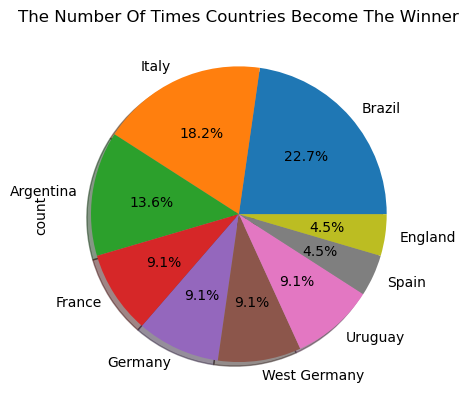

In [21]:
#Times a particular country is winner, first runner up and second runner up
winner = world_cup['Champion'].value_counts().reset_index()
world_cup['Champion'].value_counts().plot(kind = 'pie',autopct ='%0.1f%%',title="The Number Of Times Countries Become The Winner", shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})
#fig.update_traces(textinfo='label+value')
plt.show()

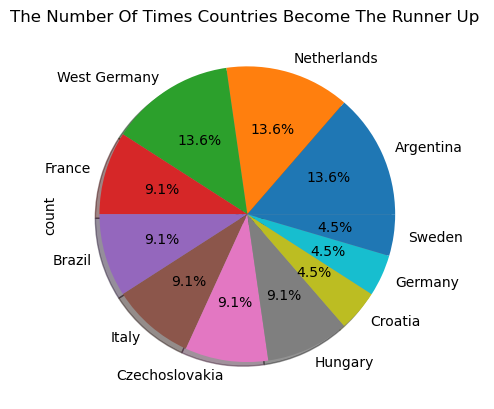

In [22]:
Runner_up = world_cup['Runner-Up'].value_counts().reset_index()
world_cup['Runner-Up'].value_counts().plot(kind = 'pie',autopct ='%0.1f%%',title="The Number Of Times Countries Become The Runner Up ",shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})
plt.show()

In [23]:
matches['home_penalty']=matches['home_penalty'].replace(np.nan, 0)

In [24]:
matches['away_penalty']=matches['away_penalty'].replace(np.nan, 0)

In [25]:
home_goals_penality=matches['home_score']+matches['home_penalty']

In [26]:
away_goals_penality=matches['away_score']+matches['away_penalty']

In [27]:
matches.insert(5,'Total_home',home_goals_penality)

In [28]:
matches.insert(9,'Total_away',away_goals_penality)

In [29]:
third_run_up =matches[matches['Round']=='Third-place match']

In [30]:
def sep_third(matches):
    if matches['Total_home'] > matches['Total_away']:
        return matches['home_team']
    else:
        return matches['away_team']

In [31]:
third_run_up=third_run_up.apply(sep_third, axis =1).value_counts().reset_index()

In [32]:
third_run_up = third_run_up.rename(columns={'index': 'Third_place'})

In [33]:
Runner_up = Runner_up.rename(columns={'Runner-Up': 'Sec_place'})

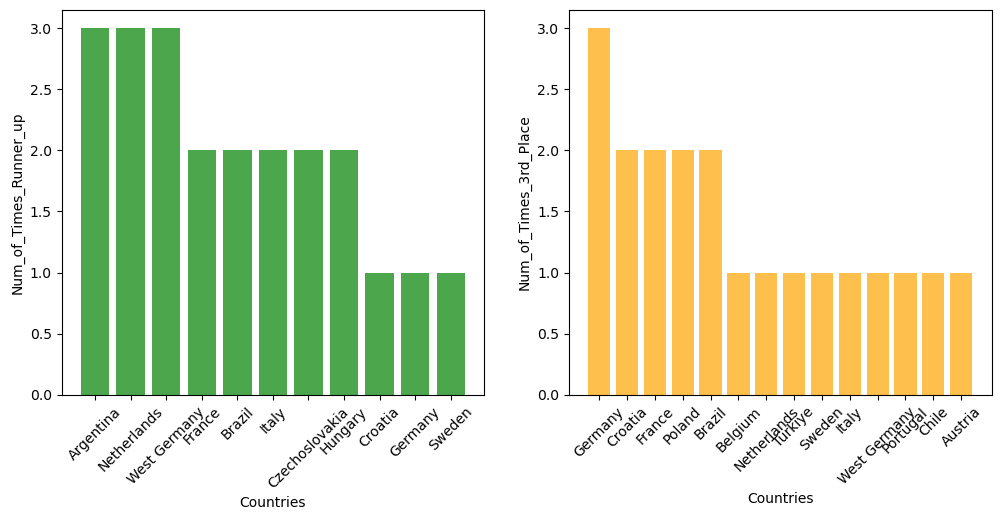

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(Runner_up['Sec_place'], Runner_up['count'], color='green', alpha=0.7)
axes[0].set_ylabel('Num_of_Times_Runner_up')
axes[0].set_xlabel('Countries')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(third_run_up['Third_place'], third_run_up['count'], color='orange', alpha=0.7)
axes[1].set_ylabel('Num_of_Times_3rd_Place')
axes[1].set_xlabel('Countries')
axes[1].tick_params(axis='x', rotation=45)

In [35]:
#In Which year a Particular team participated
data = matches.groupby('Year').agg(home = ('home_team',list),away = ('away_team',list))

In [36]:
data['teams'] = data.apply(lambda x: list(set(x['home']+x['away'])),axis=1)
data['No_of_teams'] = data['teams'].apply(len)

In [37]:
data_pivot=data['teams'].explode().reset_index().pivot(index = 'Year',columns = 'teams' ,values = 'Year').T

In [38]:
data_pivot.fillna(0,inplace = True)

In [39]:
data_pivot=data_pivot.applymap(lambda x:1 if x>0 else 0)

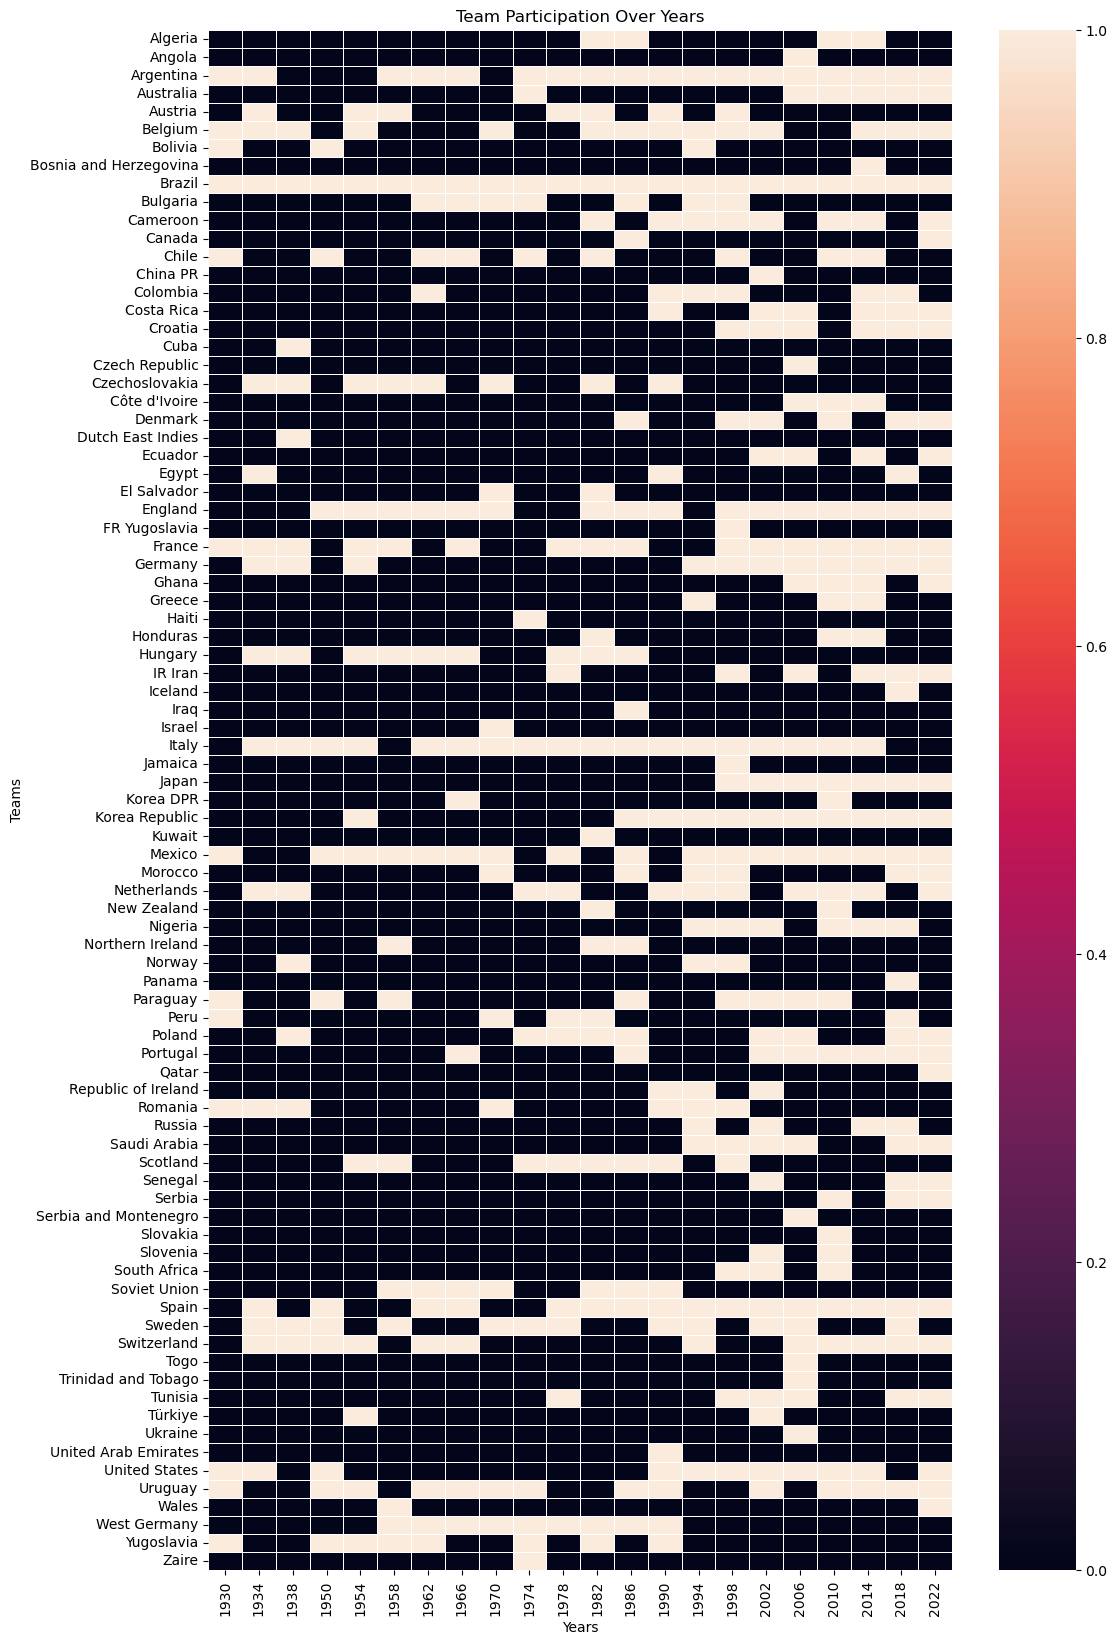

In [40]:
plt.figure(figsize=(12,20))
sns.heatmap(data_pivot,linewidth = 0.5,linecolor = 'white')
plt.title("Team Participation Over Years")
plt.xlabel("Years")
plt.ylabel("Teams")
plt.show()

In [41]:
same_rank =world_ranking[world_ranking['rank'] == world_ranking['previous_rank']]['team'].tolist()
Increased_rank = world_ranking[world_ranking['rank'] < world_ranking['previous_rank']]['team'].tolist()
Decreased_rank = world_ranking[world_ranking['rank'] > world_ranking['previous_rank']]['team'].tolist()

In [42]:
max_len = max(len(same_rank),len(Increased_rank),len(Decreased_rank))

In [43]:
same_rank += [None]*(max_len-len(same_rank))
Increased_rank += [None]*(max_len-len(Increased_rank))
Decreased_rank += [None]*(max_len-len(Decreased_rank))

In [44]:
ranks_data = pd.DataFrame({'same_rank':same_rank,
                          'Increased_rank':Increased_rank,
                          'Decreased_rank':Decreased_rank})

In [45]:
ranks_data.fillna('',inplace = True)

In [46]:
ranks_data

,same_rank,Increased_rank,Decreased_rank
0,Brazil,Italy,Spain
1,Belgium,Croatia,Mexico
2,Argentina,Switzerland,Uruguay
3,France,IR Iran,USA
4,England,Serbia,Peru
...,...,...,...
72,,Timor-Leste,
73,,Eritrea,
74,,Aruba,
75,,Bahamas,


In [47]:
def rank_sep(Country):
    result=[]
    for column in ranks_data.columns:
        matches = ranks_data[column] == Country
        if matches.any():
            result.append(column)
    return result
        

In [48]:
rank_sep('Peru')

['Decreased_rank']

# Advanced EDA 

In [49]:
country = 'Argentina'

In [50]:
df_prob = matches[((matches['home_team']== country) | (matches['away_team']==country)) & ((matches['Round']== 'Final') | (matches['Round']== 'Semi-finals') |(matches['Round']== 'Quarter-finals'))]

In [51]:
df1=df_prob['Round'].value_counts().reset_index()

In [52]:
df1

,Round,count
0,Quarter-finals,8
1,Final,6
2,Semi-finals,5


In [53]:
def winner(df):
    if df['Total_home'] > df['Total_away']:
        return df['home_team']
    else:
        return df['away_team']

In [54]:
win = df_prob.apply(winner,axis =1)
#10

In [55]:
df_prob.insert(10,'Winner',win)

In [56]:
df2 = df_prob[df_prob['Winner'] == country]['Round'].value_counts().reset_index()

In [57]:
df2

,Round,count
0,Semi-finals,5
1,Quarter-finals,4
2,Final,3


In [58]:
perform =pd.merge(df1,df2,on='Round',how='inner')

In [59]:
perform['percentage'] = (perform['count_y']/perform['count_x'])*100

In [60]:
perform

,Round,count_x,count_y,percentage
0,Quarter-finals,8,4,50.0
1,Final,6,3,50.0
2,Semi-finals,5,5,100.0


In [61]:
# we convert the above list of fun into a single function which can help us to visualize better
def performance_analyser(country):
    df_prob = matches[((matches['home_team']== country) | (matches['away_team']==country)) & ((matches['Round']== 'Final') | (matches['Round']== 'Semi-finals') |(matches['Round']== 'Quarter-finals'))]
    df1=df_prob['Round'].value_counts().reset_index()
    
    def winner(df):
        if df['Total_home'] > df['Total_away']:
            return df['home_team']
        else:
            return df['away_team']
    
    win = df_prob.apply(winner,axis =1)
    df_prob.insert(10,'Winner',win)
    df2 = df_prob[df_prob['Winner'] == country]['Round'].value_counts().reset_index()
    
    perform =pd.merge(df1,df2,on='Round',how='inner')
    perform['percentage'] = (perform['count_y']/perform['count_x'])*100
    
    return perform 
    

In [62]:
performance_analyser('Sweden')

,Round,count_x,count_y,percentage
0,Quarter-finals,5,3,60.000000
1,Semi-finals,3,1,33.333333


In [63]:
pattern = r'\b(\d+)\b'

In [64]:
#Checking playing strategy of teams in knockout vs non-knockout matches
def extract_time(row):
    if pd.notna(row['home_goal']):
        goal_str = str(row['home_goal'])
        times=[]
        matches = re.findall(pattern, goal_str)
        times.extend(matches)
        return ','.join(times)
    else:
        return ''
        

In [65]:
matches['Home_goal'] = matches.apply(extract_time,axis=1)

In [66]:
def extract_time_away(row):
    if pd.notna(row['away_goal']):
        goal_str = str(row['away_goal'])
        times=[]
        matches = re.findall(pattern, goal_str)
        times.extend(matches)
        return ','.join(times)
    else:
        return ''
        

In [67]:
matches['Away_goal'] = matches.apply(extract_time_away,axis=1)

In [68]:
knockout = ['Final','Semi-finals','Quarter-finals']
matches['knockout'] = matches['Round'].apply(lambda x: 'Knockout' if x in knockout else 'Non-Knockout')

In [69]:
country = 'Romania'

In [70]:
home_k= matches[(matches['home_team'] == country) & (matches['knockout'] == 'Knockout')]
away_k= matches[(matches['away_team'] == country) & (matches['knockout'] == 'Knockout')]

home_nk= matches[(matches['home_team'] == country) & (matches['knockout'] == 'Non-Knockout')]
away_nk= matches[(matches['away_team'] == country) & (matches['knockout'] == 'Non-Knockout')]

In [71]:
#For Knockout Matches
h=home_k['Home_goal'].str.split(',').explode().reset_index()
a=home_k['Away_goal'].str.split(',').explode().reset_index()

df1 = pd.concat([h,a],axis=0,ignore_index = True)
df1.replace('',0,inplace=True)
df1.fillna(0,inplace=True)

In [72]:
df1['Home_goal'] = df1['Home_goal'].astype(int)
df1['Away_goal'] = df1['Away_goal'].astype(int)
df1['Time'] = df1['Home_goal'] + df1['Away_goal']
df1 = df1[df1['Time']!=0]

In [73]:
def goal_time(row):
    if(row['Time'] <=45):
        return('First Half')
    elif(row['Time'] > 45 and row['Time'] <=90):
        return('Second Half')
    else:
        return('Extra Time')
    
    
df1['Time']=df1.apply(goal_time,axis=1)

In [74]:
df1['Time'].value_counts()/len(df1)*100

Time
Second Half    50.0
Extra Time     50.0
Name: count, dtype: float64

In [75]:
country = 'Romania'

In [76]:
#For Non_Knockout Matches
h_kn=home_nk['Home_goal'].str.split(',').explode().reset_index()
a_kn=home_nk['Away_goal'].str.split(',').explode().reset_index()

df2 = pd.concat([h_kn,a_kn],axis=0,ignore_index = True)
df2.replace('',0,inplace=True)
df2.fillna(0,inplace=True)

df2['Home_goal'] = df2['Home_goal'].astype(int)
df2['Away_goal'] = df2['Away_goal'].astype(int)
df2['Time'] = df2['Home_goal'] + df2['Away_goal']
df2 = df2[df2['Time']!=0]

def goal_time_nk(row):
    if(row['Time'] <=45):
        return('First Half')
    elif(row['Time'] > 45 and row['Time'] <=90):
        return('Second Half')
    else:
        return('Extra Time')

df2['Time']=df2.apply(goal_time_nk,axis=1)

In [77]:
df2['Time'].value_counts()/len(df2)*100

Time
Second Half    65.0
First Half     35.0
Name: count, dtype: float64

In [78]:
# Does Substitution turns out to be fruitfull or not for team..
matches.head(3)

,home_team,away_team,home_score,home_xg,home_penalty,Total_home,away_score,away_xg,away_penalty,Total_away,home_manager,home_captain,away_manager,away_captain,Attendance,Venue,Officials,Round,Date,Score,Referee,Notes,Host,Year,home_goal,away_goal,home_goal_long,away_goal_long,home_own_goal,away_own_goal,home_penalty_goal,away_penalty_goal,home_penalty_miss_long,away_penalty_miss_long,home_penalty_shootout_goal_long,away_penalty_shootout_goal_long,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long,Home_goal,Away_goal,knockout
0,Argentina,France,3,3.3,4.0,7.0,3,2.2,2.0,5.0,Lionel Scaloni,Lionel Messi,Didier Deschamps,Hugo Lloris,88966,"Lusail Iconic Stadium, Lusail",Szymon Marciniak (Referee) · Paweł Sokolnicki ...,Final,2022-12-18,(4) 3–3 (2),Szymon Marciniak,Argentina won on penalty kicks following extra...,Qatar,2022,Ángel Di María · 36|Lionel Messi · 108,Kylian Mbappé · 81,['36&rsquor;|2:0|Ángel Di María|Assist:|Alexis...,['81&rsquor;|2:2|Kylian Mbappé|Assist:|Marcus ...,NaN,NaN,Lionel Messi (P) · 23,Kylian Mbappé (P) · 80|Kylian Mbappé (P) · 118,NaN,NaN,"['2|1:1|Lionel Messi', '4|2:1|Paulo Dybala', '...","['1|0:1|Kylian Mbappé', '7|3:2|Randal Kolo Mua...",NaN,"['3|1:1|Kingsley Coman', '5|2:1|Aurélien Tchou...",NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...,"36,108",81,Knockout
1,Croatia,Morocco,2,0.7,0.0,2.0,1,1.2,0.0,1.0,Zlatko Dalić,Luka Modrić,Hoalid Regragui,Hakim Ziyech,44137,"Khalifa International Stadium, Doha",Abdulrahman Ibrahim Al Jassim (Referee) · Tale...,Third-place match,2022-12-17,2–1,Abdulrahman Ibrahim Al Jassim,NaN,Qatar,2022,Joško Gvardiol · 7|Mislav Oršić · 42,Achraf Dari · 9,['7&rsquor;|1:0|Joško Gvardiol|Assist:|Ivan Pe...,['9&rsquor;|1:1|Achraf Dari'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...,"7,42",9,Non-Knockout
2,France,Morocco,2,2.0,0.0,2.0,0,0.9,0.0,0.0,Didier Deschamps,Hugo Lloris,Hoalid Regragui,Romain Saïss,68294,"Al Bayt Stadium, Al Khor",César Arturo Ramos (Referee) · Alberto Morín (...,Semi-finals,2022-12-14,2–0,César Arturo Ramos,NaN,Qatar,2022,Theo Hernández · 5|Randal Kolo Muani · 79,NaN,"['5&rsquor;|1:0|Theo Hernández', '79&rsquor;|2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...,"5,79",,Knockout


In [79]:
def parse_substitution_data(row):
    if pd.isna(row):
        return ''
    else:
        pattern = r"(\d+)&rsquor;\|(\d+:\d+)\|([\w\sÁÉÍÓÚáéíóúñÑ]+)\|for ([\w\sÁÉÍÓÚáéíóúñÑ]+)"
        matches = re.findall(pattern,row)
        return [{'minute':int(match[0]),'score':match[1],'player_in':match[2],'player_out':match[3]} for match in matches]

In [80]:
matches['home_substitute_in_long'].apply(parse_substitution_data)[0]

[{'minute': 64,
  'score': '2:0',
  'player_in': 'Marcos Acuña',
  'player_out': 'Ángel Di María'},
 {'minute': 91,
  'score': '2:2',
  'player_in': 'Gonzalo Montiel',
  'player_out': 'Nahuel Molina'},
 {'minute': 102,
  'score': '2:2',
  'player_in': 'Leandro Paredes',
  'player_out': 'Rodrigo De Paul'},
 {'minute': 103,
  'score': '2:2',
  'player_in': 'Lautaro Martínez',
  'player_out': 'Julián Álvarez'},
 {'minute': 116,
  'score': '3:2',
  'player_in': 'Germán Pezzella',
  'player_out': 'Alexis Mac Allister'},
 {'minute': 1,
  'score': '3:3',
  'player_in': 'Paulo Dybala',
  'player_out': 'Nicolás Tagliafico'}]

In [81]:
matches['home_substitutions'] = matches['home_substitute_in_long'].apply(parse_substitution_data)
matches['away_substitutions'] = matches['away_substitute_in_long'].apply(parse_substitution_data)

In [82]:
def goal_parser(goals):
    if pd.isna(goals):
        return[]
    goal_list= goals.split('|')
    parsed_goal = []
    for goal in goal_list:
        parts = goal.split('·')
        if(len(parts) == 2):
            try:
                minute = int(parts[1].strip())
                scorer = parts[0].strip()
                parsed_goal.append({'minute':minute,'scorer':scorer})
            except ValueError:
                pass
    return parsed_goal
            

In [83]:
matches['Home_goal_details']=matches['home_goal'].apply(goal_parser)
matches['Away_goal_details']=matches['away_goal'].apply(goal_parser)

In [84]:
def filter_matches_based_on_team(df,team_name):
    team_matches = df[(df['home_team'] == team_name)|(df['away_team'] == team_name)]
    return team_matches

In [85]:
team_name='Sweden'
team_match_df=filter_matches_based_on_team(matches,team_name)

In [86]:
team_match_df

,home_team,away_team,home_score,home_xg,home_penalty,Total_home,away_score,away_xg,away_penalty,Total_away,home_manager,home_captain,away_manager,away_captain,Attendance,Venue,Officials,Round,Date,Score,Referee,Notes,Host,Year,home_goal,away_goal,home_goal_long,away_goal_long,home_own_goal,away_own_goal,home_penalty_goal,away_penalty_goal,home_penalty_miss_long,away_penalty_miss_long,home_penalty_shootout_goal_long,away_penalty_shootout_goal_long,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long,Home_goal,Away_goal,knockout,home_substitutions,away_substitutions,Home_goal_details,Away_goal_details
68,Sweden,England,0,0.5,0.0,0.0,2,1.0,0.0,2.0,Janne Andersson,Andreas Granqvist,Gareth Southgate,Harry Kane,39991,"Cosmos Arena, Samara",Björn Kuipers (Referee) · Sander van Roekel (A...,Quarter-finals,2018-07-07,0–2,Björn Kuipers,NaN,Russia,2018,NaN,Harry Maguire · 30|Dele Alli · 59,NaN,['30&rsquor;|0:1|Harry Maguire|Assist:|Ashley ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['88&rsquor;|0:2|John Guidetti', '90+4&rsquor;...",['87&rsquor;|0:2|Harry Maguire'],['65&rsquor;|0:2|John Guidetti|for Ola Toivone...,"['77&rsquor;|0:2|Fabian Delph|for Dele Alli', ...",,"30,59",Knockout,"[{'minute': 65, 'score': '0:2', 'player_in': '...","[{'minute': 77, 'score': '0:2', 'player_in': '...",[],"[{'minute': 30, 'scorer': 'Harry Maguire'}, {'..."
72,Sweden,Switzerland,1,1.3,0.0,1.0,0,0.7,0.0,0.0,Janne Andersson,Andreas Granqvist,Vladimir Petković,Valon Behrami,64042,"Gazprom Arena, Sankt-Petersburg",Damir Skomina (Referee) · Jure Praprotnik (AR1...,Round of 16,2018-07-03,1–0,Damir Skomina,NaN,Russia,2018,Emil Forsberg · 66,NaN,['66&rsquor;|1:0|Emil Forsberg|Assist:|Ola Toi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Michael Lang · 90+3,NaN,NaN,['31&rsquor;|0:0|Mikael Lustig'],"['61&rsquor;|0:0|Valon Behrami', '68&rsquor;|1...",['82&rsquor;|1:0|Martin Olsson|for Emil Forsbe...,['73&rsquor;|1:0|Breel Embolo|for Steven Zuber...,66,,Non-Knockout,"[{'minute': 82, 'score': '1:0', 'player_in': '...","[{'minute': 73, 'score': '1:0', 'player_in': '...","[{'minute': 66, 'scorer': 'Emil Forsberg'}]",[]
85,Mexico,Sweden,0,1.4,0.0,0.0,3,2.4,0.0,3.0,Juan Carlos Osorio,Andrés Guardado,Janne Andersson,Robin Olsen,33061,"Stadion Central'nyj, Yekaterinburg",Néstor Pitana (Referee) · Hernán Maidana (AR1)...,Group stage,2018-06-27,0–3,Néstor Pitana,NaN,Russia,2018,NaN,Ludwig Augustinsson · 50,NaN,['50&rsquor;|0:1|Ludwig Augustinsson|Assist:|V...,NaN,Edson Álvarez (OG) · 74,NaN,Andreas Granqvist (P) · 62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['1&rsquor;|0:0|Jesús Gallardo', '61&rsquor;|0...","['26&rsquor;|0:0|Seb Larsson', '88&rsquor;|0:3...",['65&rsquor;|0:2|Marco Fabián|for Jesús Gallar...,['57&rsquor;|0:1|Gustav Svensson|for Seb Larss...,,50,Non-Knockout,"[{'minute': 65, 'score': '0:2', 'player_in': '...","[{'minute': 57, 'score': '0:1', 'player_in': '...",[],"[{'minute': 50, 'scorer': 'Ludwig Augustinsson'}]"
101,Germany,Sweden,2,1.4,0.0,2.0,1,0.9,0.0,1.0,Joachim Löw,Manuel Neuer,Janne Andersson,Andreas Granqvist,44287,"Olimpiyskiy Stadion Fisht, Sochi",Szymon Marciniak (Referee) · Paweł Sokolnicki ...,Group stage,2018-06-23,2–1,Szymon Marciniak,NaN,Russia,2018,Marco Reus · 48|Toni Kroos · 90+5,Ola Toivonen · 32,['48&rsquor;|1:1|Marco Reus|Assist:|Mario Góme...,['32&rsquor;|0:1|Ola Toivonen|Assist:|Viktor C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jérôme Boateng · 82,NaN,['71&rsquor;|1:1|Jérôme Boateng'],"['52&rsquor;|1:1|Albin Ekdal', '90+7&rsquor;|2...",['31&rsquor;|0:0|İlkay Gündoğan|for Sebastian ...,['74&rsquor;|1:1|Jimmy Durmaz|for Viktor Claes...,"48,90,5",32,Non-Knockout,"[{'minute': 31, 'score': '0:0', 'player_in': '...","[{'minute': 74, 'score': '1:1', 'player_in': '...","[{'minute': 48, 'scorer': 'Marco Reus'}]","[{'minute': 32, 'scorer': 'Ola To

In [87]:
def subs_goal(subs,goals):
    if not subs:
        return 
    for sub in subs:
        if any(goal['scorer']== sub['player_in']for goal in goals):
            return True
    return False

def check_subs_goal(row , team_name):
    if row['home_team'] == team_name:
        return subs_goal(row['home_substitutions'], row['Home_goal_details'])
    elif row['away_team'] == team_name:
        return subs_goal(row['away_substitutions'], row['Away_goal_details'])
    return False    

In [88]:
def impact_after_subs(row, team_name):
    if row['home_team'] == team_name:
        subs = row['home_substitutions']
        goal_before = [goal for goal in row['Home_goal_details'] if subs and goal['minute']<=subs[0]['minute']] if subs else []
        goal_after = [goal for goal in row['Home_goal_details'] if subs and goal['minute']>subs[0]['minute']] if subs else []
    elif row['away_team'] == team_name:
        subs = row['away_substitutions']
        goal_before = [goal for goal in row['Away_goal_details'] if subs and goal['minute']<=subs[0]['minute']] if subs else []
        goal_after = [goal for goal in row['Away_goal_details'] if subs and goal['minute']>subs[0]['minute']] if subs else []
    else:
        return False
    
    return len(goal_after) > len(goal_before)

In [89]:
team_match_df['substitution_impact']= team_match_df.apply(lambda row: impact_after_subs(row,team_name),axis=1)
team_match_df['substitution_goal']= team_match_df.apply(lambda row: check_subs_goal(row,team_name),axis=1)

C:\Users\admin\AppData\Local\Temp\ipykernel_15404\3311774368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_match_df['substitution_impact']= team_match_df.apply(lambda row: impact_after_subs(row,team_name),axis=1)
C:\Users\admin\AppData\Local\Temp\ipykernel_15404\3311774368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_match_df['substitution_goal']= team_match_df.apply(lambda row: check_subs_goal(row,team_name),axis=1)


In [90]:
match_summaries=[]
for index, row in team_match_df.iterrows():
    match_summary = {
        'Match':f"{row['home_team']} 'vs'{row['away_team']}",
        'Date': row['Date'],
        'Substitute_Score': row['substitution_goal'],
        'Positive_Impact': row['substitution_impact']
    }
    
    match_summaries.append(match_summary)

In [91]:
summary_df = pd.DataFrame(match_summaries)

In [92]:
summary_df

,Match,Date,Substitute_Score,Positive_Impact
0,Sweden 'vs'England,2018-07-07,False,False
1,Sweden 'vs'Switzerland,2018-07-03,False,False
2,Mexico 'vs'Sweden,2018-06-27,False,False
3,Germany 'vs'Sweden,2018-06-23,False,False
4,Sweden 'vs'Korea Republic,2018-06-18,False,False
5,Germany 'vs'Sweden,2006-06-24,False,False
6,Sweden 'vs'England,2006-06-20,False,False
7,Sweden 'vs'Paraguay,2006-06-15,False,True
8,Trinidad and Tobago 'vs'Sweden,2006-06-10,False,False
9,Sweden 'vs'Senegal,2002-06-16,False,False


In [93]:
print(summary_df['Substitute_Score'].value_counts())
print('*****')
print(summary_df['Positive_Impact'].value_counts())

Substitute_Score
False    32
True      2
Name: count, dtype: int64
*****
Positive_Impact
False    44
True      7
Name: count, dtype: int64


In [94]:
#Team Expected Performance and Actual Performance
home_team_stats = matches.groupby(['home_team','Year']).agg({
    'home_score':'sum',
    'home_xg':'sum'
}).rename(columns={'home_score':'Total_goal_home'}).reset_index()


#Away Team
away_team_stats=matches.groupby(['away_team','Year']).agg({
    'away_score':'sum',
    'away_xg':'sum'
}).rename(columns={'away_score':'Total_goal_away'}).reset_index()

In [95]:
home_team_stats=home_team_stats[(home_team_stats['Year'] == 2018 )|(home_team_stats['Year'] == 2022)]
away_team_stats=away_team_stats[(away_team_stats['Year'] == 2018 )|(away_team_stats['Year'] == 2022)]

In [102]:
home_team_stats.rename(columns ={'home_team':'Team'},inplace=True)
away_team_stats.rename(columns ={'away_team':'Team'},inplace=True)

In [104]:
merged_df = pd.merge(home_team_stats,away_team_stats,on=['Team','Year'] ,how = 'inner')

In [108]:
merged_df['Total_goal'] = merged_df['Total_goal_home']+merged_df['Total_goal_away']
merged_df['Total_xg'] = merged_df['home_xg']+merged_df['away_xg']
merged_df['Deviation'] = merged_df['Total_xg'] - merged_df['Total_goal']

In [109]:
merged_df

,Team,Year,Total_goal_home,home_xg,Total_goal_away,away_xg,Total_goal,Total_xg,Deviation
0,Argentina,2018,1,3.2,5,1.7,6,4.9,-1.1
1,Argentina,2022,11,9.7,4,5.4,15,15.1,0.1
2,Australia,2018,0,0.9,2,2.3,2,3.2,1.2
3,Australia,2022,1,0.6,3,1.7,4,2.3,-1.7
4,Belgium,2018,13,11.2,3,2.2,16,13.4,-2.6
...,...,...,...,...,...,...,...,...,...
59,Tunisia,2022,1,1.4,0,0.9,1,2.3,1.3
60,United States,2022,1,0.8,2,3.3,3,4.1,1.1
61,Uruguay,2018,6,5.6,1,1.6,7,7.2,0.2
62,Uruguay,2022,0,0.6,2,3.1,2,3.7,1.7
